In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [3]:
class BMIState(TypedDict):
    height: float # in mtrs
    weight: float # in kgs
    bmi: float
    category: str

In [4]:
def bmi_calculator(state: BMIState) -> BMIState:
    state['bmi'] = round(state["weight"]/state["height"]**2, 2)
    return state

In [5]:
def weight_category(state: BMIState) -> BMIState:
    bmi = state["bmi"]
    if bmi < 18.5:
        state["category"] = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        state["category"] = "healthy"
    elif bmi >= 25 and bmi < 30:
        state["category"] = "overweight"
    else:
        state["category"] = "obesity"
    return state

In [6]:
graph = StateGraph(state_schema=BMIState)
graph.add_node("bmi_calculator", bmi_calculator)
graph.add_node("weight_category", weight_category)
graph.add_edge(START, "bmi_calculator")
graph.add_edge("bmi_calculator","weight_category")
graph.add_edge("weight_category", END)
app = graph.compile()

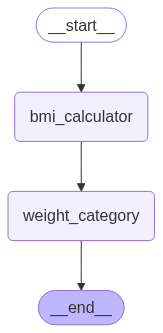

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
response = app.invoke({"weight": 84.5, "height": 1.67})

In [11]:
response

{'height': 1.67, 'weight': 84.5, 'bmi': 30.3, 'category': 'obesity'}